# Data Science in Marketing : Customer Segmentation with Python - Part 1

## Mempersiapkan Library dan Data

Data tersebut memiliki tujuh kolom dengan penjelasan sebagai berikut:
* Customer ID: Kode pelanggan dengan format campuran teks CUST- diikuti angka
* Nama Pelanggan: Nama dari pelanggan dengan format teks tentunya
* Jenis Kelamin: Jenis kelamin dari pelanggan, hanya terdapat dua isi data kategori yaitu Pria dan Wanita
* Umur: Umur dari pelanggan dalam format angka
* Profesi: Profesi dari pelanggan, juga bertipe teks kategori yang terdiri dari Wiraswasta, Pelajar, Professional, Ibu Rumah Tangga, dan Mahasiswa.
* Tipe Residen: Tipe tempat tinggal dari pelanggan kita, untuk dataset ini hanya ada dua kategori: Cluster dan Sector.
* Nilai Belanja Setahun: Merupakan total belanja yang sudah dikeluarkan oleh pelanggan tersebut.

Masalah ini akan dapat di selesaikan dengan menggunakan bantuan library - library di bawah ini:
* Pandas, digunakan untuk melakukan pemrosesan analisis data
* Matplotlib, digunakan sebagai dasar untuk melakukan visualisasi data
* Seaborn, digunakan di atas matplotlib untuk melakukan data visualisasi yang lebih menarik
* Scikit - Learn, digunakan untuk mempersiapkan data sebelum dilakukan permodelan
* kmodes, digunakan untuk melakukan permodelan menggunakan algoritma K-Modes dan K-Prototypes.
* Pickle, digunakan untuk melakukan penyimpanan dari model yang akan di buat.

In [28]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder  
 
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
  
import pickle  
from pathlib import Path

In [29]:
# import dataset  
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")  
  
# menampilkan data  
print(df.head())

  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  
0       Sector              9497927  
1      Cluster              2722700  
2      Cluster              5286429  
3      Cluster              5204498  
4      Cluster             10615206  


In [30]:
# Menampilkan informasi data  
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


## Kesimpulan

Setelah melakukan pemanggilan data dan melihat informasi data yang kamu miliki, kamu akhirnya mengetahui bahwa:

* Data yang akan digunakan terdiri dari 50 baris dan 7 kolom
* Tidak ada nilai null pada data
* Dua kolom memiliki tipe data numeric dan lima data bertipe string

## Eksplorasi Data Numerik

In [31]:
# Fungsi untuk membuat plot  
def observasi_num(features):  
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    sns.boxplot(df[kol], ax = axs[i][0])
	    sns.distplot(df[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.wa

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomness: float)
 

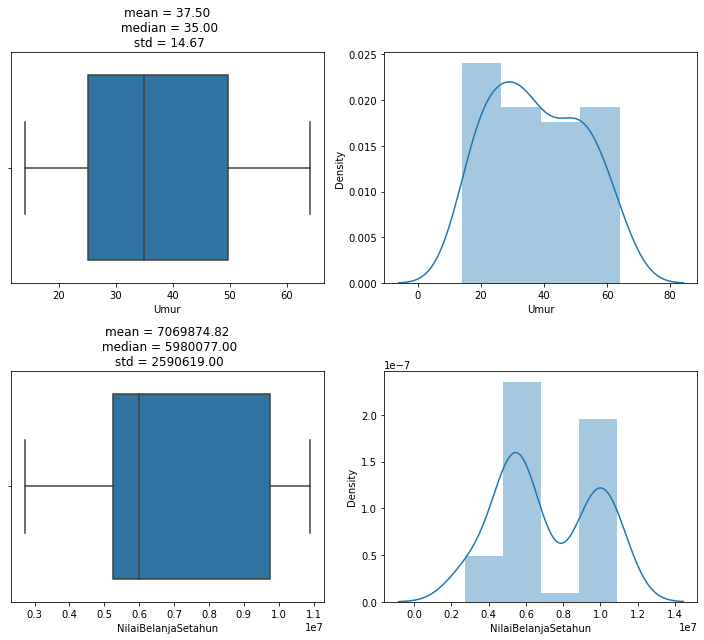

In [32]:
# Memanggil fungsi untuk membuat Plot untuk data numerik  
kolom_numerik = ['Umur','NilaiBelanjaSetahun']
observasi_num(kolom_numerik)

## Eksplorasi Data Kategorikal

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomness: float)
 

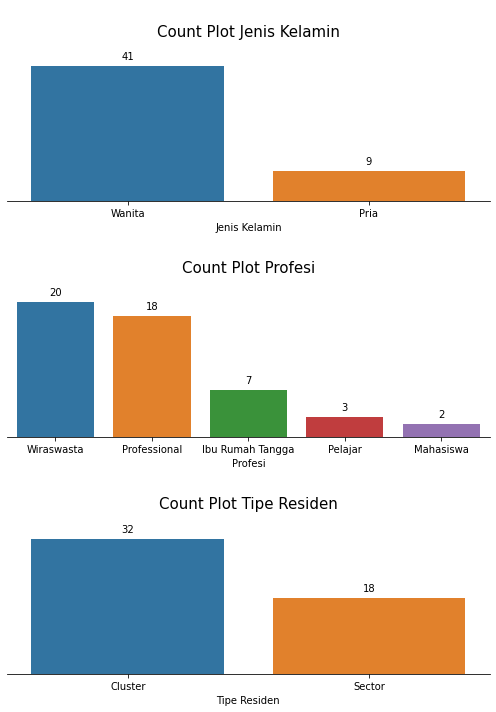

In [33]:
# Menyiapkan kolom kategorikal  
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen'] 

# Membuat canvas
fig, axs = plt.subplots(3,1,figsize=(7,10)) 

# Membuat plot untuk setiap kolom kategorikal  
for i, kol in enumerate(kolom_kategorikal):  
    # Membuat Plot
    sns.countplot(df[kol], order = df[kol].value_counts().index, ax = axs[i])  
    axs[i].set_title('\nCount Plot %s\n'%(kol), fontsize=15)  
      
    # Memberikan anotasi  
    for p in axs[i].patches:  
        axs[i].annotate(format(p.get_height(), '.0f'),  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points') 
          
    # Setting Plot  
    sns.despine(right=True,top = True, left = True)  
    axs[i].axes.yaxis.set_visible(False) 
    plt.setp(axs[i])
    plt.tight_layout()

# Tampilkan plot
plt.show()

## Kesimpulan

Dari hasil eksplorasi data tersebut kamu dapat mendapatkan informasi:

* Rata-rata dari umur pelanggan adalah 37.5 tahun
* Rata-rata dari nilai belanja setahun pelanggan adalah 7,069,874.82
* Jenis kelamin pelanggan di dominasi oleh wanita sebanyak 41 orang (82%) dan laki-laki sebanyak 9 orang (18%)
* Profesi terbanyak adalah Wiraswasta (40%) diikuti dengan Professional (36%) dan lainnya sebanyak (24%)
* Dari seluruh pelanggan 64% dari mereka tinggal di Cluster dan 36% nya tinggal di Sektor

## Mempersiapkan Data Sebelum Permodelan

Setiap machine learning model memiliki karakteristik yang berbeda-beda. Hal ini membuat kamu harus mempersiapkan data yang kamu miliki sebelum digunakan untuk melakukan permodelan. Sehingga dapat menyesuaikan dengan karakteristik yang dimiliki oleh tiap model dan mendapatkan hasil yang optimal.

Kamu berencana akan melakukan permodelan dengan menggunakan teknik unsupervised clustering. Algoritma yang akan digunakan adalah K-Prototypes. Salah satu faktor utama dalam algoritma ini adalah kamu perlu menggunakan data yang skala antar variabelnya setara. Selain itu kita juga perlu melakukan encoding kolom - kolom kategorikal yang dimiliki menjadi numerik. Kemudian menggabungkan hasil pemrosesan data tersebut menjadi satu dataframe untuk digunakan dalam permodelan.

## Standarisasi Kolom Numerik

Supaya mendapatkan hasil yang maksimal dalam penerapan algoritma ini, kamu perlu menjadikan data-data numerik yang kamu miliki berada pada satu skala. Hal ini dapat dilakukan dengan melakukan standardisasi data yang kamu miliki. Tujuannya adalah agar variabel yang memiliki skala besar tidak mendominasi bagaimana cluster akan dibentuk dan juga tiap variabel akan dianggap sama pentingnya oleh algoritma yang akan digunakan.

In [34]:
from sklearn.preprocessing import StandardScaler

kolom_numerik = ['Umur','NilaiBelanjaSetahun']

# Statistik sebelum Standardisasi
print('Statistik Sebelum Standardisasi\n')
print(df[kolom_numerik ].describe().round(1))

# Standardisasi
df_std = StandardScaler().fit_transform(df[kolom_numerik])

# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)

# Menampilkan contoh isi data dan summary statistic
print('Contoh hasil standardisasi\n')
print(df_std.head())

print('Statistik hasil standardisasi\n')
print(df_std.describe().round(0))

Statistik Sebelum Standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   37.5            7069874.8
std    14.7            2590619.0
min    14.0            2722700.0
25%    25.0            5257529.8
50%    35.0            5980077.0
75%    49.8            9739615.0
max    64.0           10884508.0
Contoh hasil standardisasi

       Umur  NilaiBelanjaSetahun
0  1.411245             0.946763
1 -1.617768            -1.695081
2  0.722833            -0.695414
3  1.067039            -0.727361
4  0.240944             1.382421
Statistik hasil standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean    0.0                 -0.0
std     1.0                  1.0
min    -2.0                 -2.0
25%    -1.0                 -1.0
50%    -0.0                 -0.0
75%     1.0                  1.0
max     2.0                  1.0


## Konversi Kategorikal Data dengan Label Encoder

Selanjutnya kamu perlu merubah kolom-kolom yang berjenis kategorikal menjadi angka. Kita akan menggunakan salah satu fungsi dari sklearn yaitu LabelEncoder. Pada dasarnya fungsi ini akan melakukan konversi data pelanggan dari teks menjadi numerik.

Sebagai contoh untuk kolom Jenis Kelamin, teks "Pria" akan diubah menjadi angka 0 dan teks "Wanita" akan diuubah menjadi angka satu. Perubahan ini perlu kita untuk semua teks sebelum digunakan pada algoritma K-Prototype.

In [35]:
from sklearn.preprocessing import LabelEncoder

# Inisiasi nama kolom kategorikal
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']

# Membuat salinan data frame
df_encode = df[kolom_kategorikal].copy()


# Melakukan labelEncoder untuk semua kolom kategorikal
for col in kolom_kategorikal:
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

# Menampilkan data
print(df_encode.head())

   Jenis Kelamin  Profesi  Tipe Residen
0              0        4             1
1              1        2             0
2              0        3             0
3              0        3             0
4              1        4             0


## Menggabungkan Data untuk Permodelan

Setelah menyelesaikan dua tahap sebelumnya, kali ini kamu akan menggabungkan kedua hasil pemrosesan tersebut menjadi satu data frame. Data frame ini yang akan digunakan untuk permodelan.

In [36]:
# Menggabungkan data frame
df_model = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')
print(df_model.head())

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             1  1.411245             0.946763
1              1        2             0 -1.617768            -1.695081
2              0        3             0  0.722833            -0.695414
3              0        3             0  1.067039            -0.727361
4              1        4             0  0.240944             1.382421


## Kesimpulan

Kemudian melakukan data eksplorasi dan pemrosesan data hingga mendapatkan data yang siap digunakan untuk permodelan. 

Tips:

Pada aplikasi di industri, proses pemrosesan data ini termasuk yang paling banyak menghabiskan waktu bagi data scientist. Selain yang sudah kita lakukan masih banyak teknik lain yang perlu dilakukan. Sebagai contoh kadang kita perlu melakukan data imputation ketika ada null data di dataset yang akan kita gunakan. Selain itu kadang kita juga perlu melakukan transformasi variabel, misalnya ketika kita memiliki distribusi data yang condong ke salah satu sisi (skew data). Tambahan contoh lainnya yaitu terkadang kita perlu menangani pencilan yang ada di data kita.

# Data Science in Marketing : Customer Segmentation with Python - Part 2

## Apa itu Clustering dan Algoritma K-Prototypes

Clustering adalah proses pembagian objek-objek ke dalam beberapa kelompok (cluster) berdasarkan tingkat kemiripan antara satu objek dengan yang lain.

Terdapat beberapa algoritma untuk melakukan clustering ini. Salah satu yang populer adalah k-means.

K-means itu sendiri biasa nya hanya digunakan untuk data-data yang bersifat numerik. Sedangkan untuk yang bersifat kategorikal saja, kita bisa menggunakan k-modes.

Lalu bagaimana apabila di data kita terdapat gabungan kategorikal dan numerikal variabel? Jawabannya kita bisa menggunakan algoritma k-prototype yang merupakan gabungan dari k-means dan k-modes. Hal ini bisa dilakukan dengan menggunakan library k-modes yang didalamnya terdapat modul kprototype.

Untuk menggunakan algoritma kprototype kamu perlu memasukkan jumlah cluster yang dikehendaki dan juga memberikan index kolom untuk kolom-kolom yang bersifat kategorikal.

Untuk lebih lengkapnya kamu bisa melihat dokumentasi dari kprototype melalui link berikut: https://github.com/nicodv/kmodes

## Mencari Jumlah Cluster yang Optimal

Salah satu parameter penting yang harus dimasukkan pada algoritma kprototype adalah jumlah cluster yang diinginkan. Oleh karena itu, kamu perlu mencari jumlah cluster yang optimal. Salah satu cara untuk mendapatkan nilai optimal tersebut adalah dengan menggunakan bantuan 'elbow plot'.

Elbow plot ini dapat dibuat dengan cara memvisualisasikan total jarak seluruh data kita ke pusat cluster-nya. Selanjutnya kita memilih titik siku dari pola yang terbentuk dan menjadikannya sebagai jumlah cluster kita.

 

Untuk melakukan hal ini kamu perlu menjalankan algoritma kprototypes dengan berbagai jumlah cluster. Selanjutnya kamu juga menyimpan nilai cost_ dan memvisualisasikannya dengan line plot atau point plot.

In [37]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
df_model = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv')

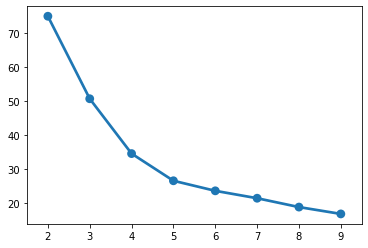

In [38]:
# Melakukan Iterasi untuk Mendapatkan nilai Cost
cost = {}
for k in range(2,10):
  kproto = KPrototypes(n_clusters = k,random_state=75)
  kproto.fit_predict(df_model, categorical=[0,1,2])
  cost[k]= kproto.cost_

# Memvisualisasikan Elbow Plot
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))
plt.show()


## Membuat Model

Selanjutnya kamu dapat melakukan pembuatan model dengan jumlah kluster yang sudah didapat pada tahap sebelumnya yaitu 5 dan menyimpan hasilnya sebagai pickle file.

In [39]:
import pickle
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

kproto = KPrototypes(n_clusters=5, random_state = 75)
kproto = kproto.fit(df_model, categorical=[0,1,2])

#Save Model
pickle.dump(kproto, open('cluster.pkl', 'wb'))

## Menggunakan Model

In [40]:
# Menentukan segmen tiap pelanggan
clusters = kproto.predict(df_model, categorical=[0,1,2])
print('segmen pelanggan: {}\n'.format(clusters))

# Menggabungkan data awal dan segmen pelanggan
df_final = df.copy()
df_final['cluster'] = clusters
print(df_final.head())

segmen pelanggan: [3 1 2 2 0 4 3 2 4 4 2 2 3 3 0 4 4 2 0 1 0 2 4 0 0 2 0 4 2 2 1 3 1 0 4 0 4
 3 4 1 4 0 4 0 4 0 2 3 4 3]

  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  cluster  
0       Sector              9497927        3  
1      Cluster              2722700        1  
2      Cluster              5286429        2  
3      Cluster              5204498        2  
4      Cluster             10615206        0  


## Menampilkan Cluster Tiap Pelanggan

In [41]:
# Menampilkan data pelanggan berdasarkan cluster nya  
for i in range (0,5):
    print('\nPelanggan cluster: {}\n'.format(i))
    print(df_final[df_final['cluster']== i])


Pelanggan cluster: 0

   Customer_ID       Nama Pelanggan Jenis Kelamin  Umur     Profesi  \
4     CUST-005  Ibu Sri Wahyuni, IR        Wanita    41  Wiraswasta   
14    CUST-015     Shirley Ratuwati        Wanita    20  Wiraswasta   
18    CUST-019         Mega Pranoto        Wanita    32  Wiraswasta   
20    CUST-021     Lestari Fabianto        Wanita    38  Wiraswasta   
23    CUST-024        Putri Ginting        Wanita    39  Wiraswasta   
24    CUST-025       Julia Setiawan        Wanita    29  Wiraswasta   
26    CUST-027        Grace Mulyati        Wanita    35  Wiraswasta   
33    CUST-034       Deasy Arisandi        Wanita    21  Wiraswasta   
35    CUST-036       Ni Made Suasti        Wanita    30  Wiraswasta   
41    CUST-042         Yuliana Wati        Wanita    26  Wiraswasta   
43    CUST-044                 Anna        Wanita    18  Wiraswasta   
45    CUST-046         Elfira Surya        Wanita    25  Wiraswasta   

   Tipe Residen  NilaiBelanjaSetahun  cluster  
4    

## Visualisasi Hasil Clustering - Box Plot

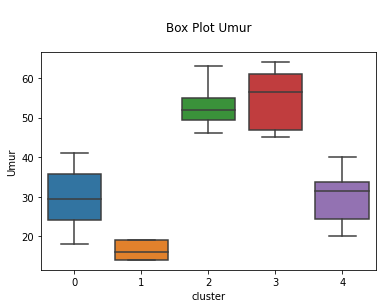

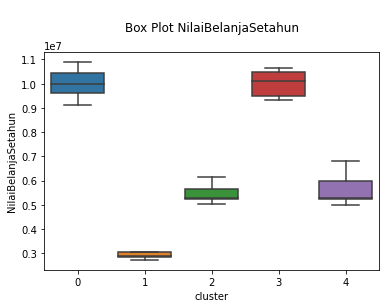

In [42]:
# Data Numerical
kolom_numerik = ['Umur','NilaiBelanjaSetahun']

for i in kolom_numerik:
    plt.figure(figsize=(6,4))
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final)
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()

## Visualisasi Hasil Clustering - Count Plot

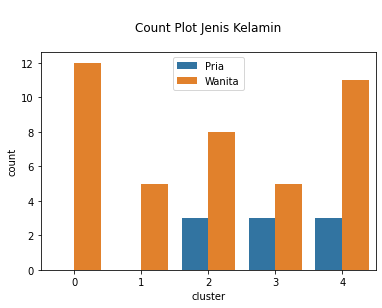

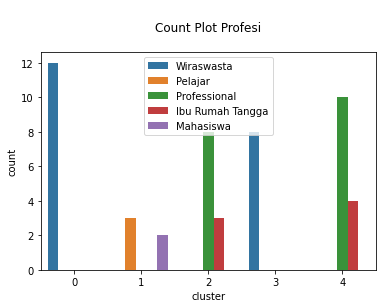

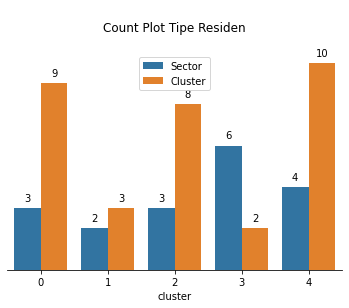

In [43]:
# Data Kategorikal
kolom_categorical = ['Jenis Kelamin','Profesi','Tipe Residen']

for i in kolom_categorical:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)
    ax.legend(loc="upper center")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center',
    va = 'center',
    xytext = (0, 10),
    textcoords = 'offset points')

sns.despine(right=True,top = True, left = True)
ax.axes.yaxis.set_visible(False)
plt.show()

## Menamakan Cluster

Dari hasil observasi yang dilakukan kamu dapat memberikan nama segmen dari tiap tiap nomor klusternya, yaitu:
* Cluster 0: Diamond Young Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Selain itu isi dari cluster ini memiliki umur sekitar 18 - 41 tahun dengan rata-ratanya adalah 29 tahun.
* Cluster 1: Diamond Senior Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Isi dari cluster ini memiliki umur sekitar 45 - 64 tahun dengan rata-ratanya adalah 55 tahun.
* Cluster 2: Silver Students, isi cluster ini adalah para pelajar dan mahasiswa dengan rata-rata umur mereka adalah 16 tahun dan nilai belanja setahun mendekati 3 juta.
* Cluster 3: Gold Young Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia muda dengan rentang umur sekitar 20 - 40 tahun dan dengan rata-rata 30 tahun dan nilai belanja setahunnya mendekati 6 juta.
* Cluster 4: Gold Senior Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia tua dengan rentang umur 46 - 63 tahun dan dengan rata-rata 53 tahun dan nilai belanja setahunnya mendekati 6 juta.

In [44]:
# Mapping nama kolom
df_final['segmen'] = df_final['cluster'].map({
0: 'Diamond Young Member',
1: 'Diamond Senior Member',
2: 'Silver Member',
3: 'Gold Young Member',
4: 'Gold Senior Member'
})

print(df_final.info())
print(df_final.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
 7   cluster              50 non-null     uint16
 8   segmen               50 non-null     object
dtypes: int64(2), object(6), uint16(1)
memory usage: 3.3+ KB
None
  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    

## Kesimpulan

Akhirnya setelah berhasil melakukan segmentasi pelanggan dan mendapatkan nama yang cocok untuk masing masing cluster, yaitu:

* Cluster 0: Diamond Young Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Selain itu isi dari cluster ini memiliki umur sekitar 18 - 41 tahun dengan rata-ratanya adalah 29 tahun.
* Cluster 1: Diamond Senior Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Isi dari cluster ini memiliki umur sekitar 45 - 64 tahun dengan rata-ratanya adalah 55 tahun.
* Cluster 2: Silver Students, isi cluster ini adalah para pelajar dan mahasiswa dengan rata-rata umur mereka adalah 16 tahun dan nilai belanja setahun mendekati 3 juta.
* Cluster 3: Gold Young Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia muda dengan rentang umur sekitar 20 - 40 tahun dan dengan rata-rata 30 tahun dan nilai belanja setahunnya mendekati 6 juta.
* Cluster 4: Gold Senior Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia tua dengan rentang umur 46 - 63 tahun dan dengan rata-rata 53 tahun dan nilai belanja setahunnya mendekati 6 juta.

## Noted

Pada aplikasi di industri proses penentuan cluster yang optimum bisa dilakukan juga dengan melihat matriks evaluasi lainnya seperti sillhoute score dan callinski-harabaz score. Untuk detailnya bisa dilihat di dokumentasi sklearn (https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation).

Selain itu penentuan jumlah cluster yang optimal juga perlu mepertimbangkan masukan dari tim yang akan menggunakan modelnya. Sehingga bisa menghasilkan cluster yang sesuai dengan kebutuhan mereka dan juga bagaimana cara mereka akan memperlakukan segmen-segmen ini.

Tantangan lainnya adalah jumlah data yang jauh lebih banyak dibanding dengan dataset yang kamu gunakan untuk latihan ini. Sehingga waktu pemrosesan datanya dan pembuatan modelnya akan menjadi lebih lama.

## Mempersiapkan Data Baru

In [45]:
# Data Baru
data = [{
    'Customer_ID': 'CUST-100' ,
    'Nama Pelanggan': 'Joko' ,
    'Jenis Kelamin': 'Pria',
    'Umur': 45,
    'Profesi': 'Wiraswasta',
    'Tipe Residen': 'Cluster' ,
    'NilaiBelanjaSetahun': 8230000
}]

# Membuat Data Frame
new_df = pd.DataFrame(data)

# Melihat Data
print(new_df)

  Customer_ID Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0    CUST-100           Joko          Pria    45  Wiraswasta      Cluster   

   NilaiBelanjaSetahun  
0              8230000  


## Membuat Fungsi Data Pemrosesan

Selanjutnya kamu perlu membuat fungsi untuk melakukan pemrosesan data berdasarkan parameter yang sama pada saat kita melakukan permodelan dan kita panggil dengan data baru kita.

Jadi fungsi ini nantinya akan bisa digunakan untuk:

Melakukan konversi data kategorikal menjadi numerik

Dari proses sebelumnya kita tau representasi tiap kode dan maksudnya yaitu:

Jenis Kelamin
* 0 : Pria
* 1 : Wanita

Profesi
* 0 : Ibu Rumah Tangga
* 1 : Mahasiswa
* 2 : Pelajar
* 3 : Professional
* 4 : Wiraswasta

Tipe Residen
* 1 : Sector
* 0 : Cluster

Selanjutnya kita harus membuat fungsi untuk merubah data kategorikal menjadi numerik berdasarkan referensi tersebut.

Melakukan standardisasi kolom numerikal

Untuk melakukan standardisasi dengan variable yang sama pada saat permodelan kita perlu menggunakan nilai rata-rata dan standard deviasi dari tiap variabel pada saat kita melakukan permodelan, yaitu:

Umur
* Rata - rata: 37.5
* Standard Deviasi: 14.7

Nilai Belanja Setahun
* Rata - rata: 7069874.8
* Standard Deviasi: 2590619.0

Dari nilai-nilai tersebut kita dapat menghitung nilai standardisasi (Z) dengan menggunakan rumus Z = (x - u)/s dengan x adalah tiap nilai, u adalah rata-rata dan s adalah standard deviasi.

Menggabungkan hasil dua proses sebelumnya menjadi satu dataframe

In [46]:
def data_preprocess(data):
    # Konversi Kategorikal data
    kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']

    df_encode = data[kolom_kategorikal].copy()

    ## Jenis Kelamin
    df_encode['Jenis Kelamin'] = df_encode['Jenis Kelamin'].map({
    'Pria': 0,
    'Wanita' : 1
    })

    ## Profesi
    df_encode['Profesi'] = df_encode['Profesi'].map({
    'Ibu Rumah Tangga': 0,
    'Mahasiswa' : 1,
    'Pelajar': 2,
    'Professional': 3,
    'Wiraswasta': 4
    })

    ## Tipe Residen
    df_encode['Tipe Residen'] = df_encode['Tipe Residen'].map({
    'Cluster': 0,
    'Sector' : 1
    })

    # Standardisasi Numerical Data
    kolom_numerik = ['Umur','NilaiBelanjaSetahun']
    df_std = data[kolom_numerik].copy()

    ## Standardisasi Kolom Umur
    df_std['Umur'] = (df_std['Umur'] - 37.5)/14.7

    ## Standardisasi Kolom Nilai Belanja Setahun
    df_std['NilaiBelanjaSetahun'] = (df_std['NilaiBelanjaSetahun'] - 7069874.8)/2590619.0

    # Menggabungkan Kategorikal dan numerikal data
    df_model = df_encode.merge(df_std, left_index = True,
    right_index=True, how = 'left')

    return df_model

# Menjalankan fungsi
new_df_model = data_preprocess(new_df)

print(new_df_model)

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             0  0.510204             0.447818


## Memanggil Model dan Melakukan Prediksi

In [47]:
def modelling (data):

    # Memanggil Model
    kpoto = pickle.load(open('cluster.pkl', 'rb'))

    # Melakukan Prediksi
    clusters = kpoto.predict(data,categorical=[0,1,2])

    return clusters

# Menjalankan Fungsi
clusters = modelling(new_df_model)

print(clusters)

[3]


## Menamakan Segmen

In [48]:
def menamakan_segmen (data_asli, clusters):

    # Menggabungkan cluster dan data asli
    final_df = data_asli.copy()
    final_df['cluster'] = clusters

    # Menamakan segmen
    final_df['segmen'] = final_df['cluster'].map({
    0: 'Diamond Young Member',
    1: 'Diamond Senior Member',
    2: 'Silver Students',
    3: 'Gold Young Member',
    4: 'Gold Senior Member'
    })

    return final_df

# Menjalankan Fungsi
new_final_df = menamakan_segmen(new_df,clusters)

print(new_final_df)

  Customer_ID Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0    CUST-100           Joko          Pria    45  Wiraswasta      Cluster   

   NilaiBelanjaSetahun  cluster             segmen  
0              8230000        3  Gold Young Member  
